In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data set into a dataframe and explore the dataset


In [31]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [32]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [33]:
star_wars.shape

(1187, 38)

In [34]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [35]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

# Cleaning up the data set

In [36]:
#Remove any rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [37]:
#star_wars should only consist of rows where RespondentID is not NaN.
star_wars['RespondentID'].notnull().sum() == star_wars.shape[0]

True

In [41]:
#Convert1 the 'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type.
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [43]:
#Convert2 the'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type.
yes_no = {
    'Yes':True,
    'No':False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [44]:
#Convert1 the'Do you consider yourself to be a fan of the Star Wars film franchise?' column to the Boolean type.
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [45]:
#Convert2 the'Do you consider yourself to be a fan of the Star Wars film franchise?' column to the Boolean type.
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [47]:
#columns should only contain the values True, False, and NaN.:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [49]:
star_wars.tail(15)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1172,3.288403e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Somewhat unfavorably,Han,Yes,Yes,Yes,Female,> 60,"$25,000 - $49,999",Bachelor degree,Mountain
1173,3.288403e+09,True,True,NaN,NaN,NaN,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,2,...,Somewhat favorably,Greedo,Yes,No,Yes,Female,> 60,NaN,High school degree,Pacific
1174,3.288403e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,30-44,NaN,Bachelor degree,Middle Atlantic
1175,3.288402e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,> 60,NaN,Some college or Associate degree,West North Central
1176,3.288401e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Somewhat favorably,Han,Yes,No,Yes,Female,45-60,"$50,000 - $99,999",Graduate degree,West South Central
1177,3.288398e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,2,...,Neither favorably nor unfavorably (neutral),I don't understand this question,No,NaN,No,Female,45-60,"$0 - $24,999",High school degree,Middle Atlantic
1178,3.288396e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,Pacific
1179,3.288395e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,18-29,NaN,Less than high school degree,West North Central
1180,3.288392e+09,True,True,NaN,NaN,NaN,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$0 - $24,999",Some college or Associate degree,West North Central
1181,3.288390e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,Han,No,NaN,No,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific


In [50]:
#Convert column 3:9 so that it only contains the values True and False.
#get the correct column names
columns = star_wars.columns[3:9]
columns

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [55]:
#get the correct values in these columns
for i in range(3,9):
    print(star_wars[star_wars.columns[i]].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [56]:
#create mapping dictionary for the values
map_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

In [57]:
# convert the values in the 6 columns to True and False 
for col in columns:
    star_wars[col] = star_wars[col].map(map_dict)

In [65]:
#create mapping dictionary for the column names
dict_columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'
}

In [68]:
#convert the column names 
star_wars = star_wars.rename(columns=dict_columns)

In [73]:
#check the result
star_wars.iloc[:,3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [78]:
star_wars.iloc[:,9:15].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [85]:
star_wars.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null object
Unnamed: 10                                                                                                                                      836 non-null object
Unnamed: 11                                                                                                                                      835 non-null object
Unnamed: 12                                                                                                                                      836 non-null object
Unnamed: 13                                                                                                                                      836 non-null object
Unnamed: 14                                                          

In [92]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [93]:
#Convert columns 9:15 to a float type.
for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].astype(float)

In [100]:
#create mapping dictionary for changing the names of column 9:15
col_dict_map = {}
for col in star_wars.columns[9:15]: 
    col_dict_map[col] = 'ranking_'+str((star_wars[9:15].columns.get_loc(col) -8))

In [101]:
col_dict_map

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [102]:
#Convert column names of columns 9:15
star_wars = star_wars.rename(columns=col_dict_map)

In [105]:
#Check the results
star_wars.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Analyzing the star wars dataset

In [107]:
#compute the mean of each of the ranking columns
star_wars.iloc[:,9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

The 5th movie is the highest ranked star wars movie in this dataset

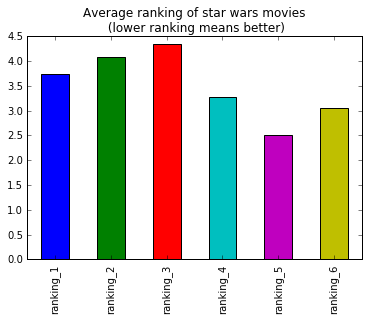

In [117]:
#bar chart of each ranking
star_wars.iloc[:,9:15].mean().plot.bar()
plt.title('Average ranking of star wars movies\n (lower ranking means better)')

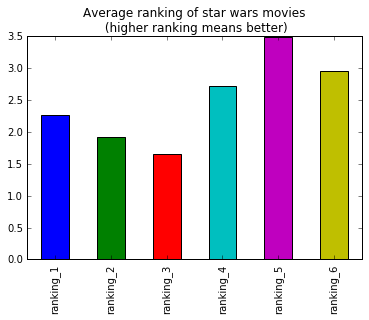

In [118]:
#bar chart where higher value means higher ranking
(6- star_wars.iloc[:,9:15].mean()).plot.bar()
plt.title('Average ranking of star wars movies\n (higher ranking means better)')

In [122]:
#Caluculate view count
view_count = star_wars.iloc[:,3:9].sum()
view_count

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

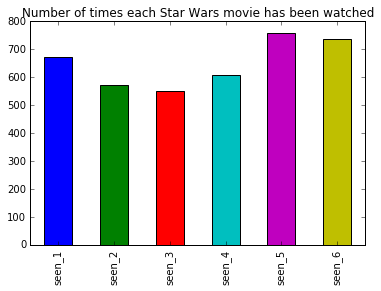

In [131]:
#Plot view count
view_count.plot.bar()
plt.title('Number of times each Star Wars movie has been watched')

In [136]:
#Split the data into two groups
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [133]:
#compute the mean of each of the ranking columns
males.iloc[:,9:15].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

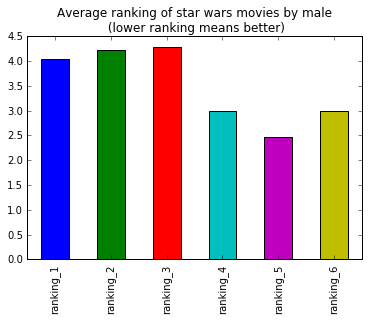

In [135]:
males.iloc[:,9:15].mean().plot.bar()
plt.title('Average ranking of star wars movies by male\n (lower ranking means better)')

In [139]:
females.iloc[:,9:15].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

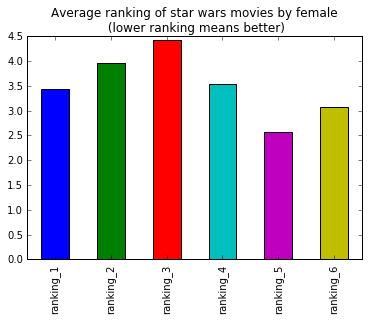

In [138]:
females.iloc[:,9:15].mean().plot.bar()
plt.title('Average ranking of star wars movies by female\n (lower ranking means better)')

Comparing ranking by sex:
    - Males rank movie 1 lower than females do
    - Males rank movie 4 higher than females do

In [140]:
#Caluculate view count by males
view_count_male = males.iloc[:,3:9].sum()
view_count_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

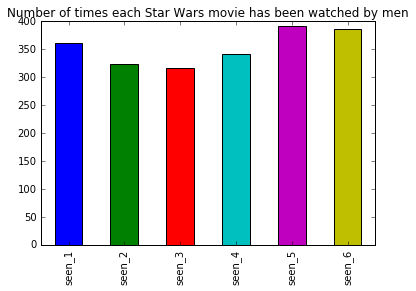

In [141]:
#Plot view count by males
view_count_male.plot.bar()
plt.title('Number of times each Star Wars movie has been watched by men')

In [145]:
#Caluculate view count by females
view_count_female = females.iloc[:,3:9].sum()
view_count_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

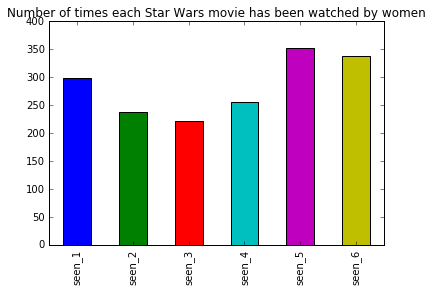

In [146]:
#Plot view count by females
view_count_female.plot.bar()
plt.title('Number of times each Star Wars movie has been watched by women')

Comparing Star Wars movies vied by sex:
    - Females have seen movie 3 the least of all the 6 movies. Also movie 3 is ranked the lowest by males and females
    - Each movie has been seen by men approximately the same number of times.